# Example Wilcoxon Sign-Ranked Test

Author(s): Miguel Xochicale @mxochicale    
Contributor(s): 

## Running notebook
```
conda activate simpleVE
jupyter notebook --browser=firefox
```
## Logbook
* 04March2023: Create notebook 
    
## References:
* https://pythonfordatascienceorg.wordpress.com/wilcoxon-sign-ranked-test-python/
* https://www.reneshbedre.com/blog/mann-whitney-u-test.html
* https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/
* https://pingouin-stats.org/build/html/index.html


In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pingouin



In [2]:
X = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10',
     'S11','S12','S13','S14','S15','S16','S17','S18','S19','S20']
Nov14 = [1.77, 1.33, 2.77, 1.77, 2.66, 3.00, 2.11, 3.00, 1.88, 1.77, 
         2.77, 2.33, 2.88, 2.11, 1.66, 1.55, 2.88, 2.33, 1.44, 1.88]
Nov23 = [2.11, 1.66, 2.77, 1.88, 2.44, 2.77, 1.88, 2.22, 1.88, 2.22, 
         2.88, 2.33, 2.66, 2.11, 2.00, 1.44, 2.77, 2.44, 2.11, 2.22]


data = {'Statements': X,
        'Nov14': Nov14,
        'Nov23': Nov23,        
        }

df = pd.DataFrame(data)
df

,Statements,Nov14,Nov23
0,S1,1.77,2.11
1,S2,1.33,1.66
2,S3,2.77,2.77
3,S4,1.77,1.88
4,S5,2.66,2.44
5,S6,3.00,2.77
6,S7,2.11,1.88
7,S8,3.00,2.22
8,S9,1.88,1.88
9,S10,1.77,2.22


In [3]:
df[['Nov14','Nov23']].describe()

,Nov14,Nov23
count,20.000000,20.000000
mean,2.194500,2.239500
std,0.558367,0.396796
min,1.330000,1.440000
25%,1.770000,1.970000
50%,2.110000,2.220000
75%,2.770000,2.495000
max,3.000000,2.880000


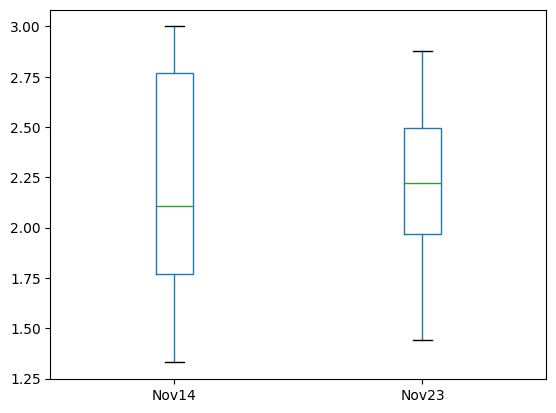

In [4]:
# There doesn’t appear to be any significant outliers in the variables.
df.boxplot(column=['Nov14', 'Nov23'], grid=False)
plt.show()

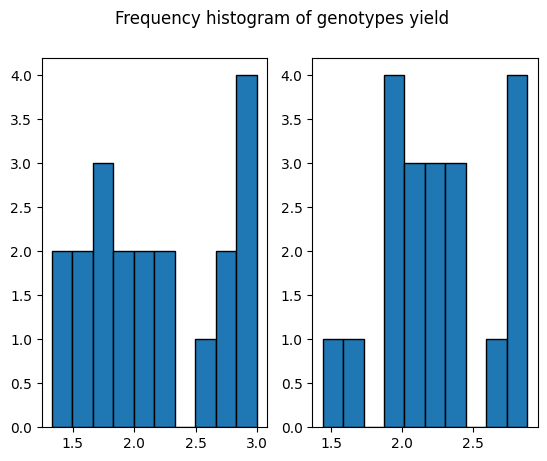

In [5]:
# The histograms of our data does not seem to be normally distributed. There looks to be some skew.
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of genotypes yield')
ax1.hist(df['Nov14'], bins=10, histtype='bar', ec='k') 
ax2.hist(df['Nov23'], bins=10, histtype='bar', ec='k') 
# ax1.set_xlabel("Yield")
# ax2.set_xlabel("Yield")
plt.show()

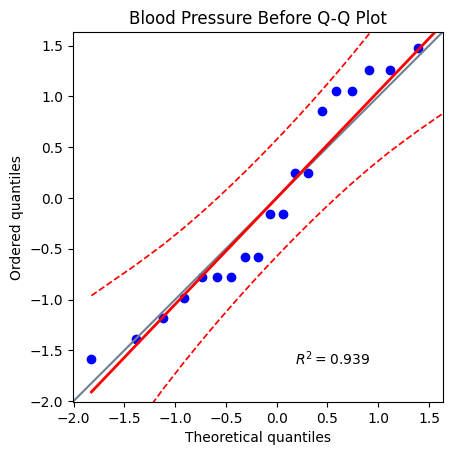

In [6]:
# stats.probplot(df['bp_before'], dist="norm", plot=plt)
pingouin.qqplot(df['Nov14'], dist='norm')
plt.title("Blood Pressure Before Q-Q Plot")
plt.show()


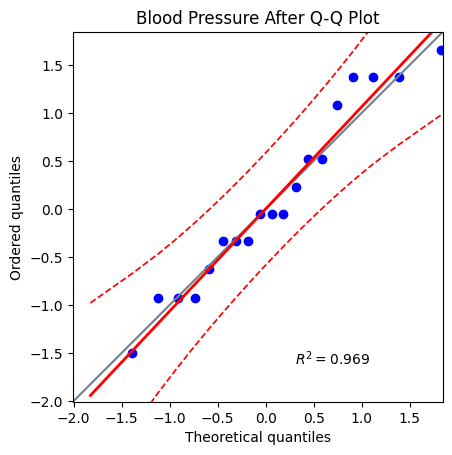

In [7]:
# stats.probplot(df['bp_after'], dist="norm", plot=plt)
pingouin.qqplot(df['Nov23'], dist='norm')
plt.title("Blood Pressure After Q-Q Plot")
plt.show()

In [8]:
stats.shapiro(df['Nov14'])


ShapiroResult(statistic=0.9166774153709412, pvalue=0.08553215861320496)

In [9]:
stats.shapiro(df['Nov23'])


ShapiroResult(statistic=0.9613643884658813, pvalue=0.5714539289474487)

In [10]:
# Both of the variables have a significant p-value which means each variable violates the assumption of normality. 
# Therefore, the Wilcoxon signed rank test, a.k.a the Wilcoxon T test, is the correct test to use 
# to analyze this data.


In [11]:
stats.wilcoxon(df['Nov14'], df['Nov23'])


/home/mxochicale/anaconda3/envs/simpleVE/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=53.5, pvalue=0.45255683361931076)

In [12]:
stats.mannwhitneyu(df['Nov14'], df['Nov23'], 
                   use_continuity=True, 
                   alternative='greater'#{'less', 'greater', 'two-sided'}.
                  ) 


MannwhitneyuResult(statistic=185.5, pvalue=0.6581068028361677)

In [13]:
pingouin.wilcoxon(df['Nov14'], df['Nov23'], 
            alternative='two-sided'
            #method='exact'
            )



# 'U-val': U-value
# 'alternative': tail of the test : must be one of 'two-sided' (default), 'greater' or 'less'.
# 'p-val': p-value
# 'RBC' : rank-biserial correlation
# 'CLES' : common language effect size
# https://pingouin-stats.org/build/html/generated/pingouin.mwu.html#pingouin.mwu 



,W-val,alternative,p-val,RBC,CLES
Wilcoxon,53.5,two-sided,0.468294,-0.213235,0.46375


In [14]:
# INTERPRETATION OF THE RESULTS
# A Wilcoxon T test was used to analyze the blood pressure before and after the intervention 
# to test if the intervention had a significant affect on the blood pressure. 
# The blood pressure before the intervention was higher (M= 156.45 ± 11.39 units) 
# compared to the blood pressure post intervention (M= 151.36 ± 14.18 units); 
# there was a statistically significant decrease in blood pressure (t=2,234.5, p= 0.0014).

# Note: Reported as Wilcoxon T test since Scipy.stats.wilcoxon() method reports the T value and not the W value